*   Static-snapshot linear analysis: Concatenate the matrices to produce a matrix A of size 104508 x 216. Compute its singular values. How fast do they decay? Could a low-order representing do a good job here?

In [1]:
import numpy as np 
from scipy import linalg
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

pl = np.load('rts_gmlc_pl.npy')
va = np.load('rts_gmlc_va.npy')
vm = np.load('rts_gmlc_vm.npy')

concat = np.concatenate((pl,va,vm),axis=1)
U,s,Vh = linalg.svd(concat,full_matrices = False)

First 50 singlar values

[325187.56355666  79784.65677941  20329.61810787   8033.27628964
   1005.54863642    289.07222315     81.78442011     33.41786665
     10.74542177      9.17728921      2.98410013      2.24133951
      1.67947222      0.84960734      0.78325124      0.33784544
      0.21043485      0.16517427      0.07837009      0.0645473
      0.05051775      0.02537296      0.01837056      0.01440031
      0.0077197       0.00759051      0.00583333      0.0040428
      0.0032641       0.00264809      0.00223598      0.00187568
      0.0014256       0.0009023       0.00050167      0.00040113
      0.00034513      0.00028457      0.00026348      0.0001804
      0.00017767      0.0001342       0.00009475      0.00007763
      0.0000478       0.00004165      0.00003152      0.00002457
      0.00001785      0.00001666]


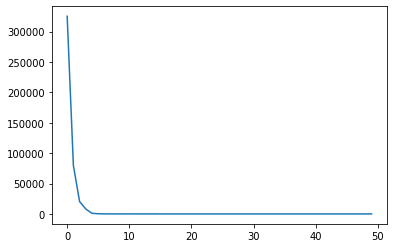

In [2]:
print(s[0:50])
plt.plot(s[0:50])

In [3]:
m,n = concat.shape[0],concat.shape[1]
sigma = np.zeros((concat.shape[1],concat.shape[1]))
for i in range(min(m,n)):
  sigma[i,i] = s[i]
re = np.dot(U,np.dot(sigma,Vh))
diff = np.linalg.norm(concat - re)
print('reconstuct error is : ',diff)

reconstuct error is :  7.337577308335846e-10


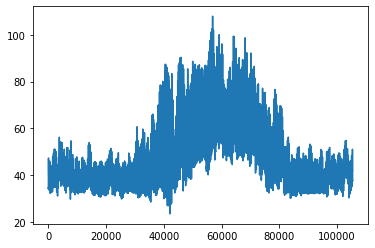

In [4]:
U_truncated = U[:,:5]
s_truncated = sigma[0:5,0:5]
Vh_truncated = Vh[0:5,:]
reconstruct = U_truncated @ s_truncated @ Vh_truncated

plt.plot(reconstruct[:,0])

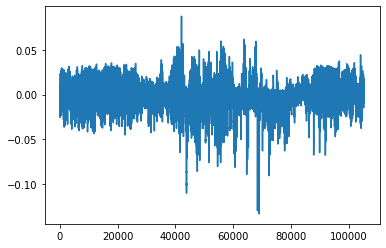

In [5]:
plt.plot(concat[:,0] - reconstruct[:,0])


*   Time-window linear analysis: We’re really interested in sequences of data. So instead of considering time points one at a time, consider overlapping time windows of, say, an hour, or two hours, or 12 hours. Produce a moving-window data matrix (call it M).

E.g. if we do an hour, take time points 1 through 12 and concatenate them, produce a vector of 216 * 12 = 2592 that is the first row of your moving-window data matrix. Then take time points 2 through 13, concatenate them, that’s the second row of M.
The result is a block-Hankel matrix of size 104498 x 2592. Compute this matrix’s singular values. Is there a good low-rank representation? What if we use a 2-hour moving window? A 12-hour moving window?

In [6]:
from tqdm import trange
def moving_window(matrix,window = 12):
  moving_window = np.zeros((matrix.shape[0],2628))
  for i in trange(105396):
    moving_window[i,:] = matrix[i:i+window,:].reshape(-1,)
  return moving_window

one_hour_window = moving_window(concat)

100%|██████████| 105396/105396 [00:01<00:00, 80472.75it/s]


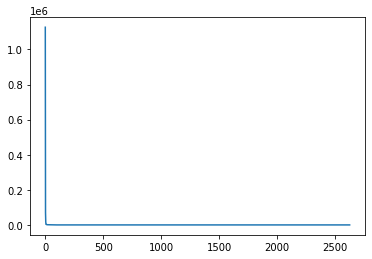

In [7]:
U,s,Vh = linalg.svd(one_hour_window,full_matrices = False) #this will take a while
plt.plot(s)

Here is the first 100 singlar values

In [8]:
print(s[0:100])

[1126401.73740149  275765.65005622   70199.20015836   28423.76912614
   16779.46201833    4828.94935402    3406.43723777    3366.40572935
    3090.27911064    2522.28940603    2329.069796      2060.48671967
    1669.8722642     1592.579294      1505.23405353    1319.31396686
    1318.07162464    1205.92598549    1112.87003145    1072.04412472
    1050.86179555     985.3953404      902.22740738     877.43224901
     729.52530599     600.31491948     598.02491022     517.8705923
     459.56312518     422.14072023     417.07541582     400.84573256
     392.94211486     336.11900385     265.24226156     252.99323917
     222.48762718     193.12298227     176.46193945     169.81341184
     156.30226599     148.53380272     146.2360904      127.03192307
     112.55976077     101.69642109      80.07182317      74.75581827
      71.38611532      63.43264005      58.43503643      52.26186378
      51.11269083      50.18612929      43.08889701      35.6761872
      30.71948233      25.22046671  